In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch import nn, optim

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

numpy.ndarray

In [4]:
feature_names = iris.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris_types = iris.target_names
iris_types

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df = pd.DataFrame(X)
df = df.set_axis([el for el in feature_names], axis = 1)
df['iris type'] = pd.DataFrame(iris_types[y])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


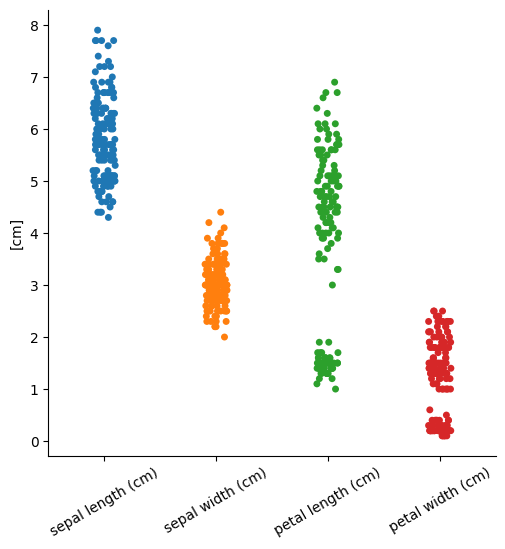

In [7]:
sns.catplot(data=df).set_xticklabels(rotation = 30, labels=feature_names).set_ylabels('[cm]')

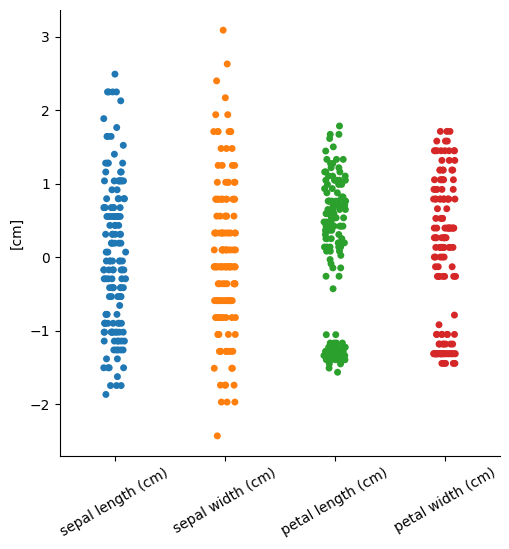

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled)
sns.catplot(data=df_scaled).set_xticklabels(rotation = 30, labels=feature_names).set_ylabels('[cm]')

In [9]:
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1,1))
y_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_onehot,test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [11]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(4, 10)  # 4 wejścia → 10 neuronów pierwszej warstwy
        self.fc2 = nn.Linear(10, 100) # 10 wejść z warstwy poprzedniej → 100 neuronów
        self.fc3 = nn.Linear(100, 3)  # 100 wejść → 3 klasy na wyjściu

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.softmax(self.fc3(x), dim=1)  # Zmiana dim=0 na dim=1 dla batchowej klasyfikacji
        return x


In [12]:
model = NeuralNet()

# Definiujemy funkcję straty (criterion) oraz optymalizator sieci
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Iteracja numer: [{epoch+1}/{num_epochs}], Błąd sieci: {loss.item():.4f}')


Iteracja numer: [10/100], Błąd sieci: 0.7134
Iteracja numer: [20/100], Błąd sieci: 0.6543
Iteracja numer: [30/100], Błąd sieci: 0.5624
Iteracja numer: [40/100], Błąd sieci: 0.5717
Iteracja numer: [50/100], Błąd sieci: 0.5579
Iteracja numer: [60/100], Błąd sieci: 0.5611
Iteracja numer: [70/100], Błąd sieci: 0.6177
Iteracja numer: [80/100], Błąd sieci: 0.5564
Iteracja numer: [90/100], Błąd sieci: 0.5544
Iteracja numer: [100/100], Błąd sieci: 0.7333


In [13]:
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, dim=1)
    _, y_test_labels = torch.max(y_test_tensor, dim=1)
    accuracy = (predicted == y_test_labels).sum().item() / y_test_labels.size(0)
    print(f'Dokładność modelu na podstawie danych testowych: poprawnych: {accuracy * 100:.2f}%')


Dokładność modelu na podstawie danych testowych: poprawnych: 100.00%


In [14]:
torch.save(model, 'classifier_model.pth')